# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [80]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [81]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [83]:
# Check the shape of the DataFrame
df.shape

(1898, 9)

In [84]:
# Get the total rows in the DataFrame
total_rows = df.shape[0]
total_columns = df.shape[1]
print(f'The DataFrame has total {total_rows} rows and {total_columns} columns')

The DataFrame has total 1898 rows and 9 columns


#### Observations:


- The dataset contains **1898 rows** and **9 columns**.
- Each row likely represents a single record or entry in the dataset.
- The dataset's column count suggests a moderate number of features for analysis, which may include both categorical and numerical data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [85]:
# Understanding the data types of the columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- The dataset contains **9 columns**, and each column has **1898 non-null entries**, indicating no missing data.
- The dataset has a mix of **data types**:
  - **int64**: Used for columns such as `order_id`, `customer_id`, `rating`, `food_preparation_time`, and `delivery_time`. These likely represent numeric and categorical IDs or numerical measurements.
  - **float64**: The `cost_of_the_order` column represents a continuous numerical value (possibly monetary amounts).
  - **object**: Columns such as `restaurant_name` and `cuisine_type` are likely categorical or text-based data.
- The memory usage of the dataset is approximately **133.6 KB**, which is efficient and manageable for analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [86]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Observations
if missing_values.sum() > 0:
    print("There are missing values in the dataset.")
else:
    print("No missing values found.")

Missing Values:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
No missing values found.


#### Observations:
- All columns in the dataset have complete data with no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [87]:
# Statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [88]:
# Statistical summary of 'food_preparation_time'
summary = df['food_preparation_time'].describe()
summary

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [89]:
# Minimum, average, and maximum time taken for food preparation
min_time = summary['min']
avg_time = summary['mean']
max_time = summary['max']

print(f"Minimum time: {min_time}")
print(f"Average time: {avg_time}")
print(f"Maximum time: {max_time}")

Minimum time: 20.0
Average time: 27.371970495258168
Maximum time: 35.0


#### Observations:
- The minimum time to prepare food is **20 minutes**.
- The average (mean) preparation time is **27.38 minutes**.
- The maximum preparation time is **35 minutes**, indicating potential outliers or variability in order preparation times.

### **Question 5:** How many orders are not rated?

In [90]:
# Count the number of orders that are not rated
not_rated_given = not_rated = df[df.rating=='Not given']
not_rated_orders = len(not_rated_given)
print(f"The number of orders that are not rated is: {not_rated_orders}")

The number of orders that are not rated is: 736


#### Observations:
- There are **736 orders of the 1836 orders** that are not rated in the dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

### Introduction to Visual Analysis

The following graphs provide an exploratory data analysis (EDA) of key numerical and categorical variables in the dataset. The visualizations aim to uncover patterns, trends, and insights that might not be immediately evident from raw data. By analyzing the distributions and relationships between variables, we can better understand customer behaviors, operational metrics, and business trends.

Each graph focuses on a specific aspect of the dataset:

1. **Distribution of Cost of the Order**: Highlights the range and frequency of order costs to identify common price ranges and outliers.
2. **Distribution of Food Preparation Time**: Provides insights into the typical time taken to prepare orders, revealing average preparation durations and potential inefficiencies.
3. **Distribution of Delivery Time**: Displays the variability in delivery times, helping identify delays or areas for improvement.
4. **Bar Chart of Ratings**: Shows the frequency of ratings provided by customers, including the proportion of unrated orders, indicating customer satisfaction trends.


In [91]:
#returns the number of unique values for each columns
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

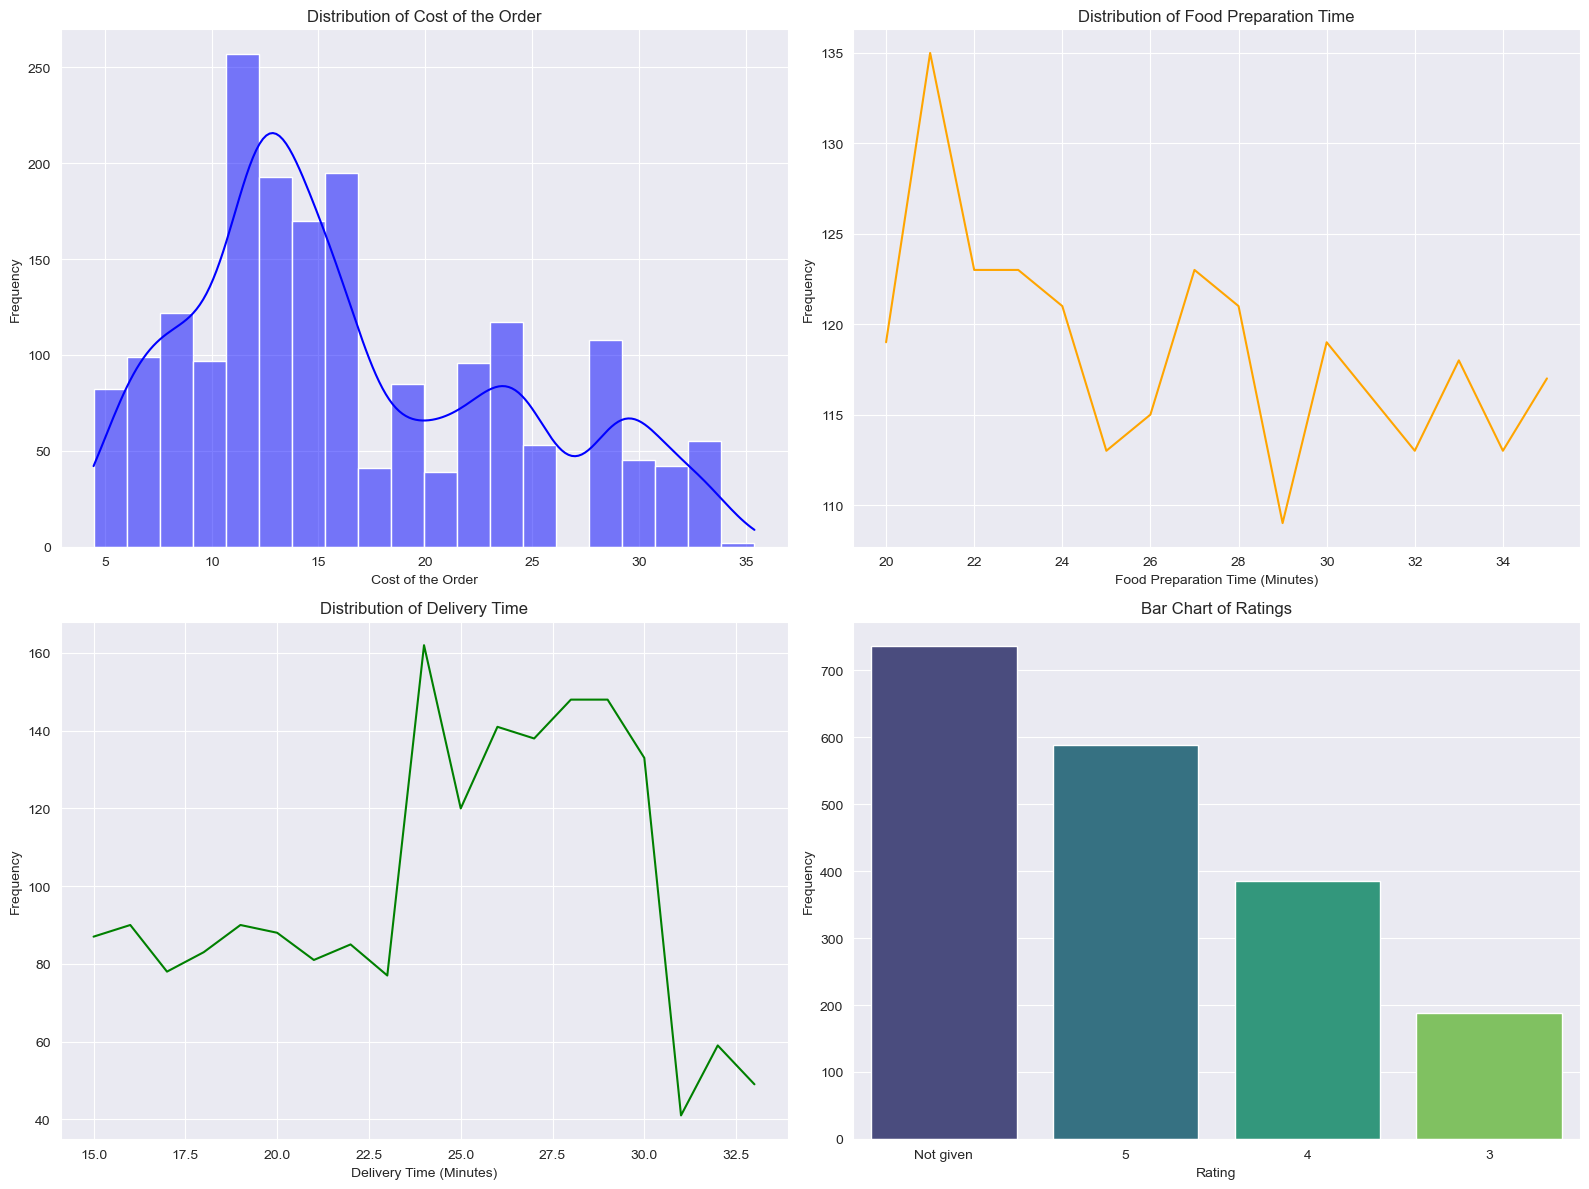

In [92]:
# Ensure the column has numeric data and no missing values
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')
df['cost_of_the_order'] = df['cost_of_the_order'].dropna()

# Prepare data for line plot
prep_time_counts = df['food_preparation_time'].value_counts().reset_index()
prep_time_counts.columns = ['food_preparation_time', 'frequency']

# Prepare data for line plot
delivery_time_counts = df['delivery_time'].value_counts().reset_index()
delivery_time_counts.columns = ['delivery_time', 'frequency']

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# Plot 1: Histogram for 'cost_of_the_order'
sns.histplot(df['cost_of_the_order'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Cost of the Order")
axes[0, 0].set_xlabel("Cost of the Order")
axes[0, 0].set_ylabel("Frequency")

# Plot 2: Line plot for 'food_preparation_time'
sns.lineplot(data=prep_time_counts, x='food_preparation_time', y='frequency', color='orange', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Food Preparation Time")
axes[0, 1].set_xlabel("Food Preparation Time (Minutes)")
axes[0, 1].set_ylabel("Frequency")

# Plot 3: Line plot for 'delivery_time'
sns.lineplot(data=delivery_time_counts, x='delivery_time', y='frequency', color='green', ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Delivery Time")
axes[1, 0].set_xlabel("Delivery Time (Minutes)")
axes[1, 0].set_ylabel("Frequency")

# Plot 4: Bar chart for 'rating'
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'frequency']
sns.barplot(x=rating_counts['rating'], y=rating_counts['frequency'], palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Bar Chart of Ratings")
axes[1, 1].set_xlabel("Rating")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

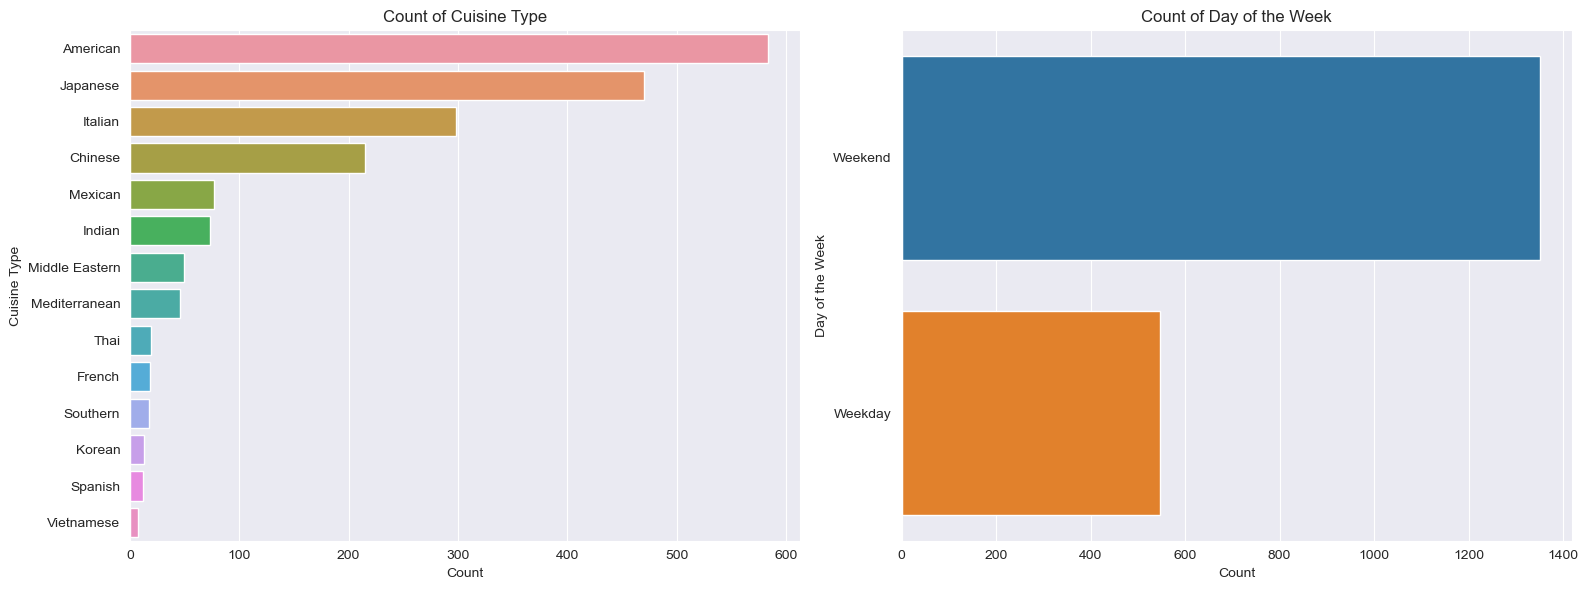

In [93]:
# For categorical columns
categorical_columns = ['cuisine_type', 'day_of_the_week']

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot 1: Count plot for 'cuisine_type'
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index, ax=axes[0])
axes[0].set_title("Count of Cuisine Type")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Cuisine Type")

# Plot 2: Count plot for 'day_of_the_week'
sns.countplot(data=df, y='day_of_the_week', order=df['day_of_the_week'].value_counts().index, ax=axes[1])
axes[1].set_title("Count of Day of the Week")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Day of the Week")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

Top 5 Restaurants:
 Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


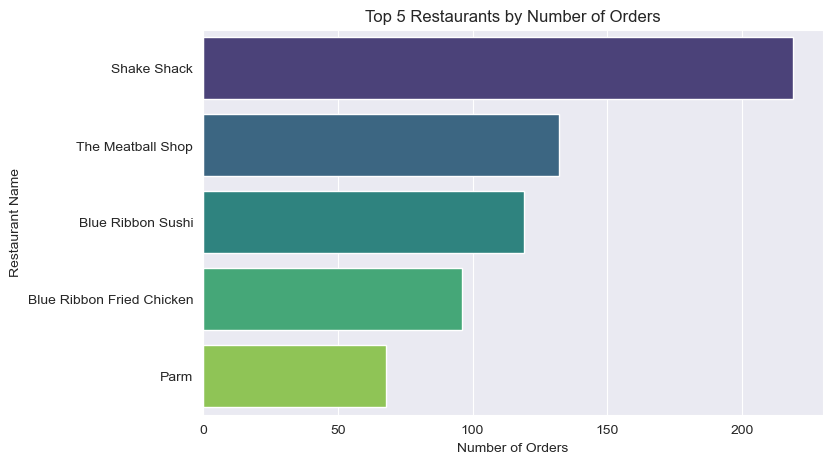

In [94]:
# Get the top 5 restaurants by order count
top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 Restaurants:\n", top_restaurants)

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')
plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.show()


#### Observations:
1. **Top Restaurant**: **Shake Shack** has the highest number of orders (**219 orders**), indicating its popularity among customers.
2. **Second Place**: **The Meatball Shop** follows with **132 orders**, significantly less than Shake Shack but still prominent.
3. **Other Popular Restaurants**:
   - **Blue Ribbon Sushi** ranks third with **119 orders**.
   - **Blue Ribbon Fried Chicken** is fourth with **96 orders**.
   - **Parm** secures the fifth spot with **68 orders**.
4. **Popularity Gap**: There is a noticeable gap between Shake Shack and the other restaurants, with almost 87 more orders than the second-highest restaurant.
5. **Customer Preferences**: The top 5 restaurants likely reflect customer preferences for specific cuisines or locations.

### **Question 8**: Which is the most popular cuisine on weekends?

In [95]:
#returns a list of cuisine types in the dataset
list(df.cuisine_type.unique())

['Korean',
 'Japanese',
 'Mexican',
 'American',
 'Indian',
 'Italian',
 'Mediterranean',
 'Chinese',
 'Middle Eastern',
 'Thai',
 'Southern',
 'French',
 'Spanish',
 'Vietnamese']

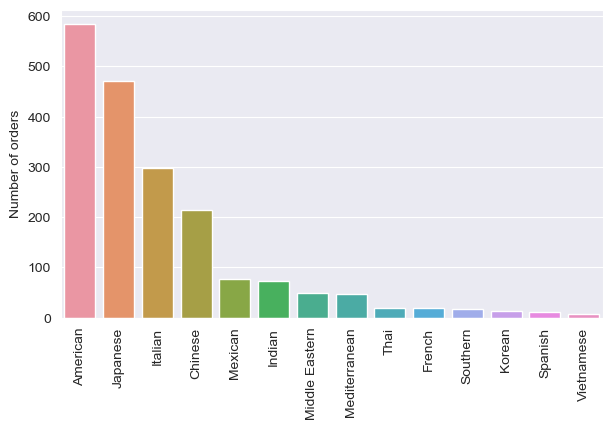

In [96]:
#plots histogram of the number of orders, from highest to lowest, for each cuisine type
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of orders')
plt.show()

In [97]:
# Filter data for weekends
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Check if the filtered data is not empty
if not weekend_data.empty:
    # Count the occurrences of each cuisine type on weekends
    popular_cuisine_weekends = weekend_data['cuisine_type'].value_counts().idxmax()
    popular_cuisine_count = weekend_data['cuisine_type'].value_counts().max()

    print(f"The most popular cuisine on weekends is: {popular_cuisine_weekends} with {popular_cuisine_count} orders.")
else:
    print("No data available for weekends.")


The most popular cuisine on weekends is: American with 415 orders.


#### Observations:
- The most popular cuisine on weekends is **American**, with **415** orders.
- This highlights a preference for American during leisure days, which could help restaurants focus promotions on these cuisines over weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [98]:
# Calculate the number of orders costing more than $20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate the percentage
total_orders = df.shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"The percentage of orders costing more than $20 is: {percentage_above_20:.2f}%")

The percentage of orders costing more than $20 is: 29.24%


#### Observations:
- **29.24%** of the total orders cost more than $20.
- This indicates that a significant portion of the orders fall into the higher price bracket, likely driven by premium menu items or higher spending customers.

### **Question 10**: What is the mean order delivery time?

In [99]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:
- The mean order delivery time is **24.16 minutes**.
- This indicates the average time customers wait for their orders to be delivered. It can serve as a benchmark for evaluating delivery performance or identifying delays.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [100]:
# Find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Display the results
for customer_id, order_count in top_customers.items():
    print(f"Customer ID: {customer_id}, Number of Orders: {order_count}")


Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


#### Observations:
- The top 3 most frequent customers and the number of orders they placed are:
  1. Customer ID: **52832**, Orders: **13**
  2. Customer ID: **47440**, Orders: **10**
  3. Customer ID: **83287**, Orders: **9**
- These customers have been identified as loyal, and offering a 20% discount voucher may help maintain their loyalty.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

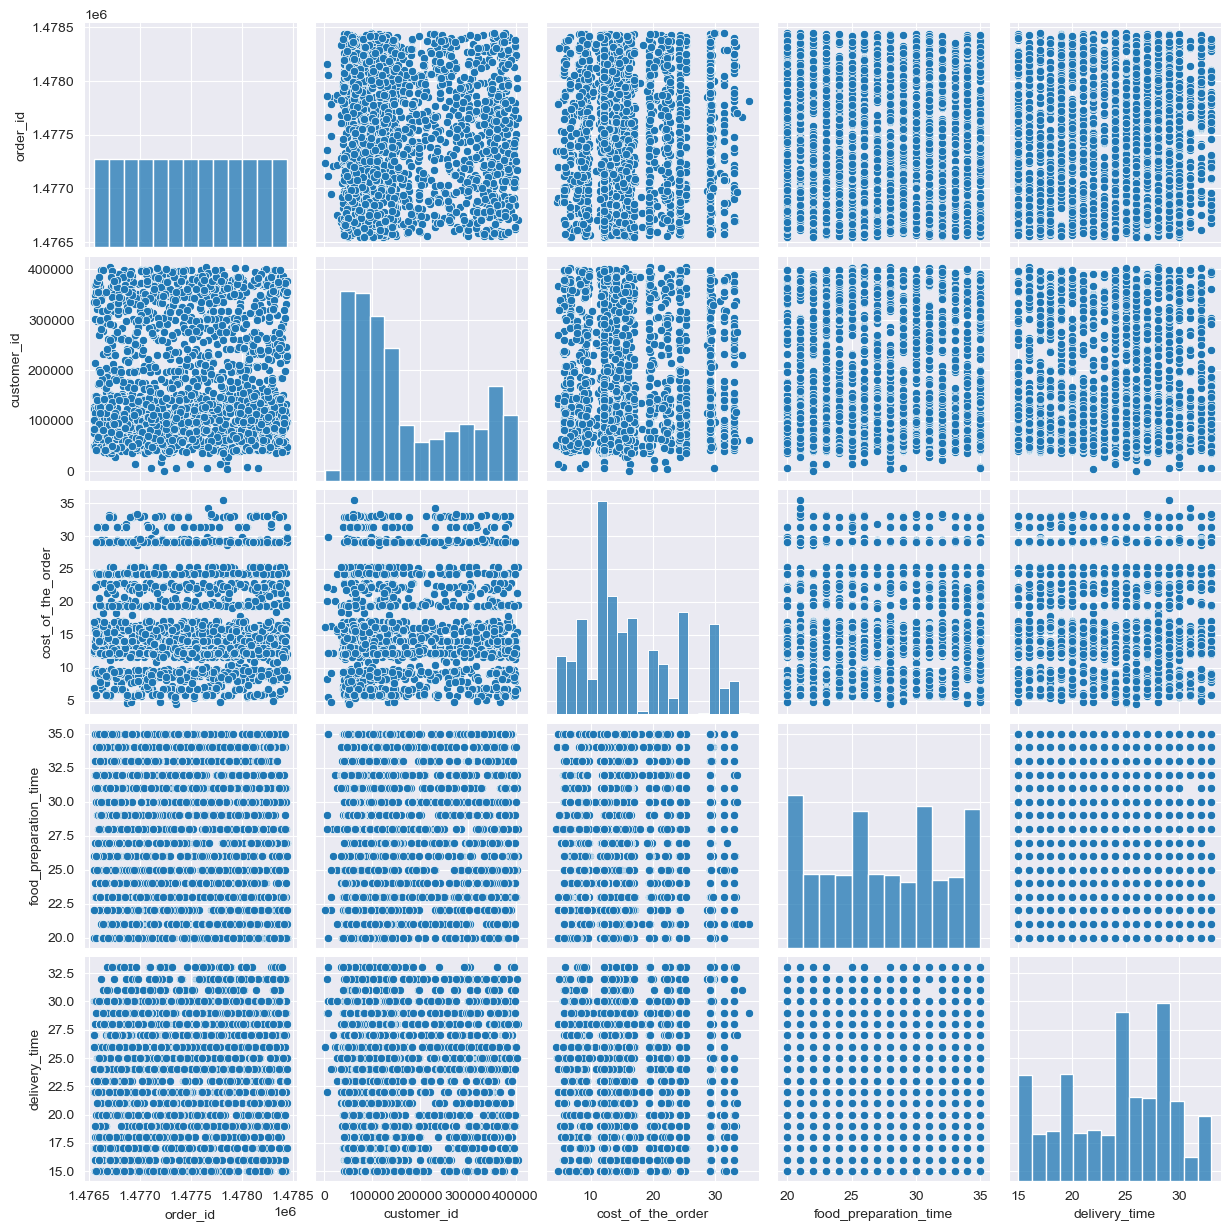

In [101]:
# Pair plot to check relationships between variables
sns.pairplot(data=df)
plt.show()

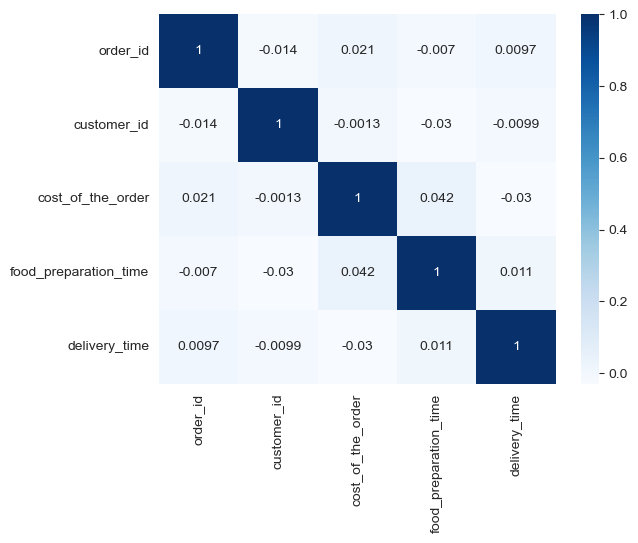

In [102]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

### Observations
- A multivariate analysis of the dataset shows no significant correlations between any of the available variables

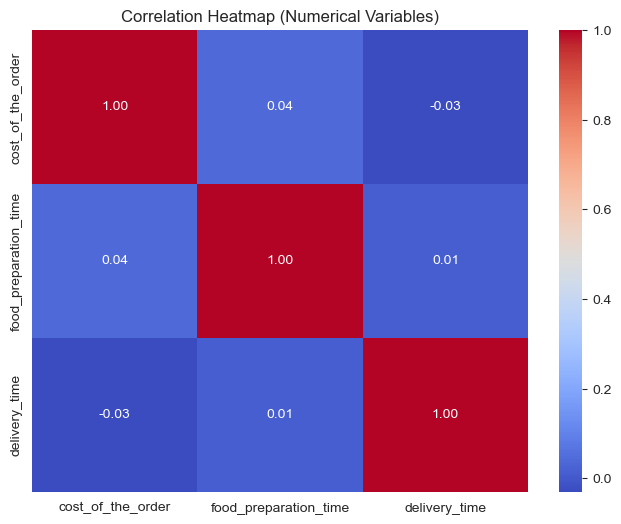

In [103]:
# Select numerical columns for analysis
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Variables)")
plt.show()

### Observations for Numerical Variables Correlation Analysis
- **Key Findings**:
  1. **Weak Correlations Across Variables**:
     - The numerical variables (`cost_of_the_order`, `food_preparation_time`, `delivery_time`) show very weak correlations with each other, with coefficients close to zero.
  2. **Cost of the Order**:
     - A negligible positive correlation (0.04) exists between `cost_of_the_order` and `food_preparation_time`.
     - A weak negative correlation (-0.03) exists between `cost_of_the_order` and `delivery_time`, suggesting that delivery time has little to no impact on order cost.
  3. **Food Preparation and Delivery Time**:
     - The correlation between `food_preparation_time` and `delivery_time` is close to zero (0.01), indicating these processes are largely independent.
  4. **Self-Correlation**:
     - As expected, each variable is perfectly correlated with itself (correlation = 1).

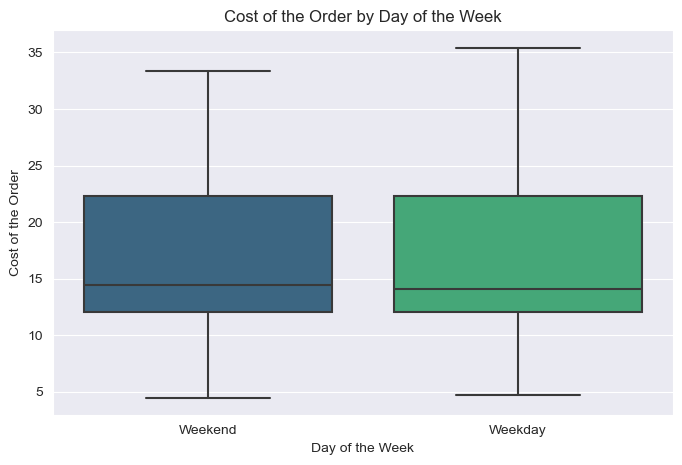

In [104]:
# Boxplot of cost of the order across weekends and weekdays
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', palette='viridis')
plt.title("Cost of the Order by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Cost of the Order")
plt.show()

### Observations for Boxplot of Cost of the Order by Day of the Week
- **Key Findings**:

    1. **Median Cost**:
       - The median cost of the order is slightly higher on **weekends** compared to **weekdays**.

    2. **Spread of Costs**:
       - Both weekends and weekdays exhibit a similar range of costs, with orders mostly falling between approximately **$10** and **$30**.
       - There are a few higher-cost orders, but they are not frequent enough to significantly affect the interquartile range (IQR).

    3. **Outliers**:
       - The boxplot shows potential outliers on both weekends and weekdays, but they are within a reasonable range.

    4. **Overall Trend**:
       - Customers appear to spend slightly more on average during weekends, likely due to higher-priced items or group orders.

    5. **Insights**:
       - Promotions and discounts could be targeted at weekends to capitalize on higher spending trends.
       - Weekdays could be targeted with offers to boost order values.


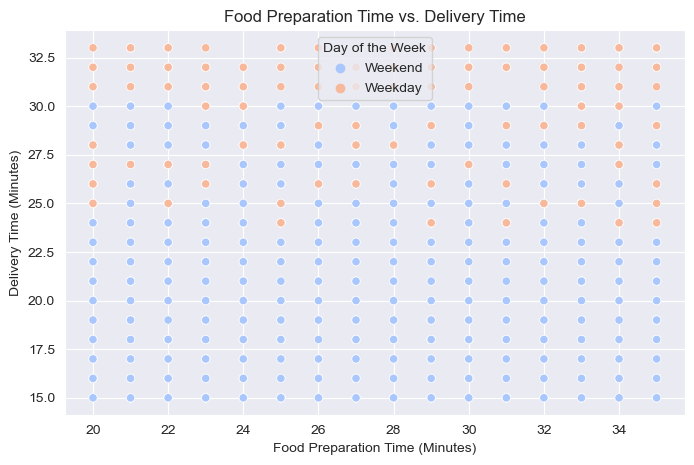

In [105]:
# Scatter plot of food preparation time vs. delivery time
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week', palette='coolwarm')
plt.title("Food Preparation Time vs. Delivery Time")
plt.xlabel("Food Preparation Time (Minutes)")
plt.ylabel("Delivery Time (Minutes)")
plt.legend(title='Day of the Week')
plt.show()

### Observations for Scatter Plot of Food Preparation Time vs. Delivery Time

- **Key Findings**:
    1. **Overall Trend**:
       - There is no clear linear relationship between **food preparation time** and **delivery time**. Both variables appear to be independent.

    2. **Clustered Points**:
       - Most data points are clustered within specific ranges:
         - **Food Preparation Time**: Between 20 and 30 minutes.
         - **Delivery Time**: Between 15 and 30 minutes.
       - This indicates that most orders fall within these preparation and delivery time windows.

    3. **Weekend vs. Weekday**:
       - The color-coded points (`hue='day_of_the_week'`) show no significant difference in the relationship between food preparation and delivery times for **weekends** and **weekdays**. Both follow a similar distribution.

    4. **Outliers**:
       - A few data points show higher delivery times, possibly due to delays or special conditions.

    5. **Insights**:
       - The lack of correlation suggests that food preparation and delivery processes are managed separately, without one significantly affecting the other.
       - Improvements in either process could be targeted independently to optimize overall service time.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [106]:
# copy the dataset and replace  all "Not given" ratings with zeroes
df_copy=df.copy()
df_copy.rating.replace("Not given",0,inplace=True)

In [107]:
df_copy.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


In [108]:
# Convert the 'rating' column to numeric
df_copy['rating'] = pd.to_numeric(df_copy['rating'])
#replaces all zero ratings as naans
df_copy['rating'].replace(0,np.nan,inplace=True)
#returns subset of restaurants with mean rating greater than or equal to 4
df_res_rating=df_copy.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()
print(df_res_rating[df_res_rating.rating>=4])

                   restaurant_name  rating
0                       'wichcraft     5.0
1             Ravagh Persian Grill     5.0
2    Chola Eclectic Indian Cuisine     5.0
3                      Chote Nawab     5.0
4                           Junoon     5.0
..                             ...     ...
134                   Pongsri Thai     4.0
135               Frank Restaurant     4.0
136               Dirty Bird to Go     4.0
137                      Rye House     4.0
138                  DuMont Burger     4.0

[139 rows x 2 columns]


In [109]:
#returns the top-five restaurants by total number of orders with ratings
df_copy.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


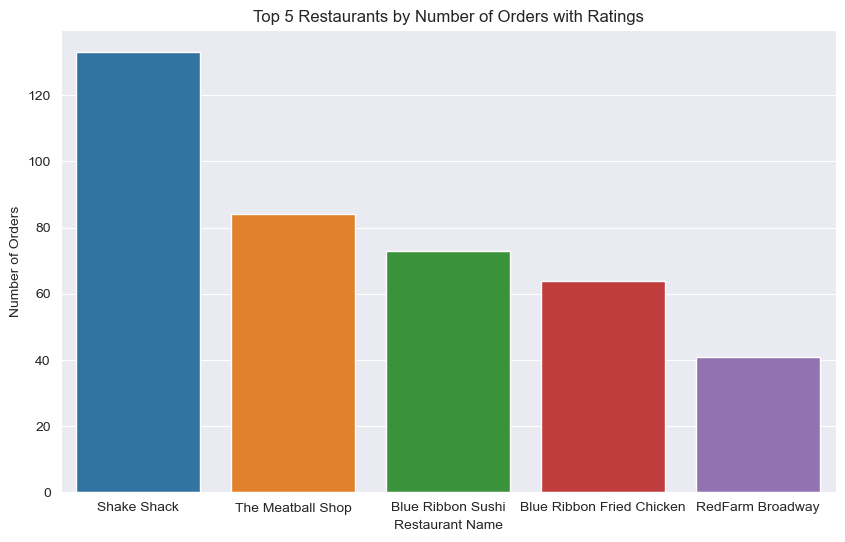

In [110]:
# make a bar plot of the top-five restaurants by total number of orders with ratings
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head(),x='restaurant_name',y='rating')
plt.title('Top 5 Restaurants by Number of Orders with Ratings')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
 - 139 restaurants have a mean rating for all orders of greater than or equal to 4
 - Only 4 restaurants have 50 or more orders with ratings
 - The following restaurants qualify for this promotional offer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [111]:
# Calculate revenue based on the cost of the orders
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission for orders costing more than $20
    elif cost > 5:
        return cost * 0.15  # 15% commission for orders costing more than $5
    else:
        return 0  # No commission for orders costing $5 or less

# Apply the revenue calculation to each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate total net revenue
total_revenue = df['revenue'].sum()

print(f"The total net revenue generated by the company is: ${total_revenue:.2f}")

The total net revenue generated by the company is: $6166.30


#### Observations:

1. **Net Revenue**:
   - The total net revenue generated by the company across all orders is **$6166.30**

2. **Revenue Breakdown**:
   - Orders with a cost greater than `$20` contribute 25% of their cost as revenue.
   - Orders with a cost between `$5` and `$20` contribute 15% of their cost as revenue.
   - Orders costing `$5` or less do not contribute any revenue.

3. **Insights**:
   - High-value orders `(above $20)` significantly impact the overall revenue due to the higher commission rate.
   - Encouraging customers to place higher-value orders can further increase revenue.
   - Providing incentives or discounts for orders above $20 could drive more sales in this segment.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [112]:
# Calculate total time required for each order (food preparation + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Calculate the percentage of such orders
total_orders = df.shape[0]
percentage_above_60 = (orders_above_60 / total_orders) * 100

print(f"The percentage of orders that take more than 60 minutes is: {percentage_above_60:.2f}%")

The percentage of orders that take more than 60 minutes is: 10.54%


#### Observations:
   - **10.54%** of orders take more than 60 minutes to get delivered (including food preparation and delivery time).


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [113]:
# Group data by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the results
for day, mean_time in mean_delivery_time.items():
    print(f"The mean delivery time on {day} is: {mean_time:.2f} minutes")


The mean delivery time on Weekday is: 28.34 minutes
The mean delivery time on Weekend is: 22.47 minutes


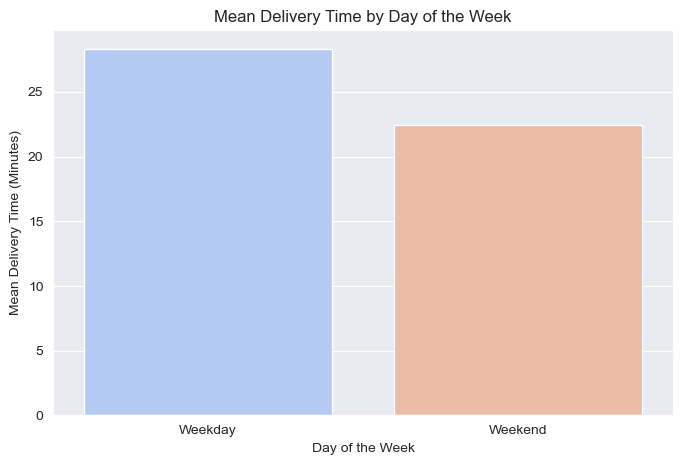

In [114]:
# Group data by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_delivery_time, x='day_of_the_week', y='delivery_time', palette='coolwarm')
plt.title("Mean Delivery Time by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Delivery Time (Minutes)")
plt.show()

#### Observations:

1. **Mean Delivery Time**:
   - **Weekdays** have a higher mean delivery time of approximately **28.34 minutes**.
   - **Weekends** have a lower mean delivery time of approximately **22.47 minutes**.

2. **Trend Analysis**:
   - Delivery times are quicker on weekends compared to weekdays, possibly due to reduced traffic or optimized operations during weekends.
   - Weekdays might experience delays due to higher order volumes or traffic congestion.

3. **Insights**:
   - The company could investigate weekday delivery operations to identify potential bottlenecks.
   - Offering incentives to delivery staff or improving route optimization on weekdays may reduce delivery times.

4. **Next Steps**:
   - Further analysis can focus on time slots to identify peak delay periods.
   - Compare delivery times for different order sizes or locations to gain deeper insights.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

1. **Customer Preferences**:
   - Certain cuisines and restaurants are significantly more popular, indicating strong customer preferences.
   - The top restaurants and cuisines contribute significantly to the total orders.

2. **Delivery and Preparation Time**:
   - Delivery times are generally quicker on weekends compared to weekdays, highlighting potential operational challenges during the week.
   - Food preparation times appear to be consistent across various scenarios but require optimization to further reduce delays.

3. **Revenue Insights**:
   - High-value orders ($20+) contribute significantly to the company's revenue due to higher commission rates.
   - There is an opportunity to increase revenue by focusing on promoting high-value orders.

4. **Ratings and Customer Feedback**:
   - Most orders do not have a rating, indicating a need to encourage customers to provide feedback.
   - Restaurants with high ratings tend to receive more orders, emphasizing the importance of customer satisfaction.

### Recommendations:

1. **Improve Weekday Operations**:
   - Analyze and optimize delivery operations during weekdays to match or surpass weekend performance.
   - Introduce dynamic routing or additional delivery resources to handle peak weekday demands.

2. **Encourage Customer Feedback**:
   - Implement incentives (e.g., discounts or loyalty points) for customers to provide ratings for their orders.
   - Use feedback data to enhance service quality and identify potential issues.

3. **Promote High-Value Orders**:
   - Offer promotional discounts or free delivery for orders above $20 to encourage customers to place larger orders.
   - Highlight premium menu options through marketing campaigns to drive higher-value transactions.

4. **Leverage Top Performers**:
   - Focus marketing efforts on the most popular restaurants and cuisines to maximize engagement and revenue.
   - Use data from top performers to improve offerings from less popular restaurants.

5. **Optimize Food Preparation Times**:
   - Collaborate with restaurants to streamline food preparation processes, especially for frequently ordered dishes.
   - Use predictive modeling to anticipate peak times and proactively manage resources.

---